In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  #可以忽略下面sns画图的时候的警告

In [2]:
# 数据加载与预处理
df = pd.read_csv('kidney_disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [3]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


**将原本就是数值类型的三行（表中是字符串）转化为数值类型**

In [4]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

**分别获取object类型的列和数值类型的列**

In [5]:
cat_cols=[col for col in df.columns if df[col].dtype == "object"]
num_cols=[col for col in df.columns if df[col].dtype !="object"]

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad: ['no' 'yes' '\tno' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
classification: ['ckd' 'ckd\t' 'notckd']


**删除缩进异常**

In [6]:
df['dm'] = df['dm'].replace(r'\s+', '', regex=True)
df['cad'] = df['cad'].replace(r'\s+', '', regex=True)
df['classification'] = df['classification'].replace(r'\s+', '', regex=True)
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' nan]
cad: ['no' 'yes' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
classification: ['ckd' 'notckd']


**将分类映射为为ckd:0、notckd:1**

In [7]:
df["classification"]=df["classification"].map({"ckd":0,"notckd":1})


**打印数值类型特征的图表**

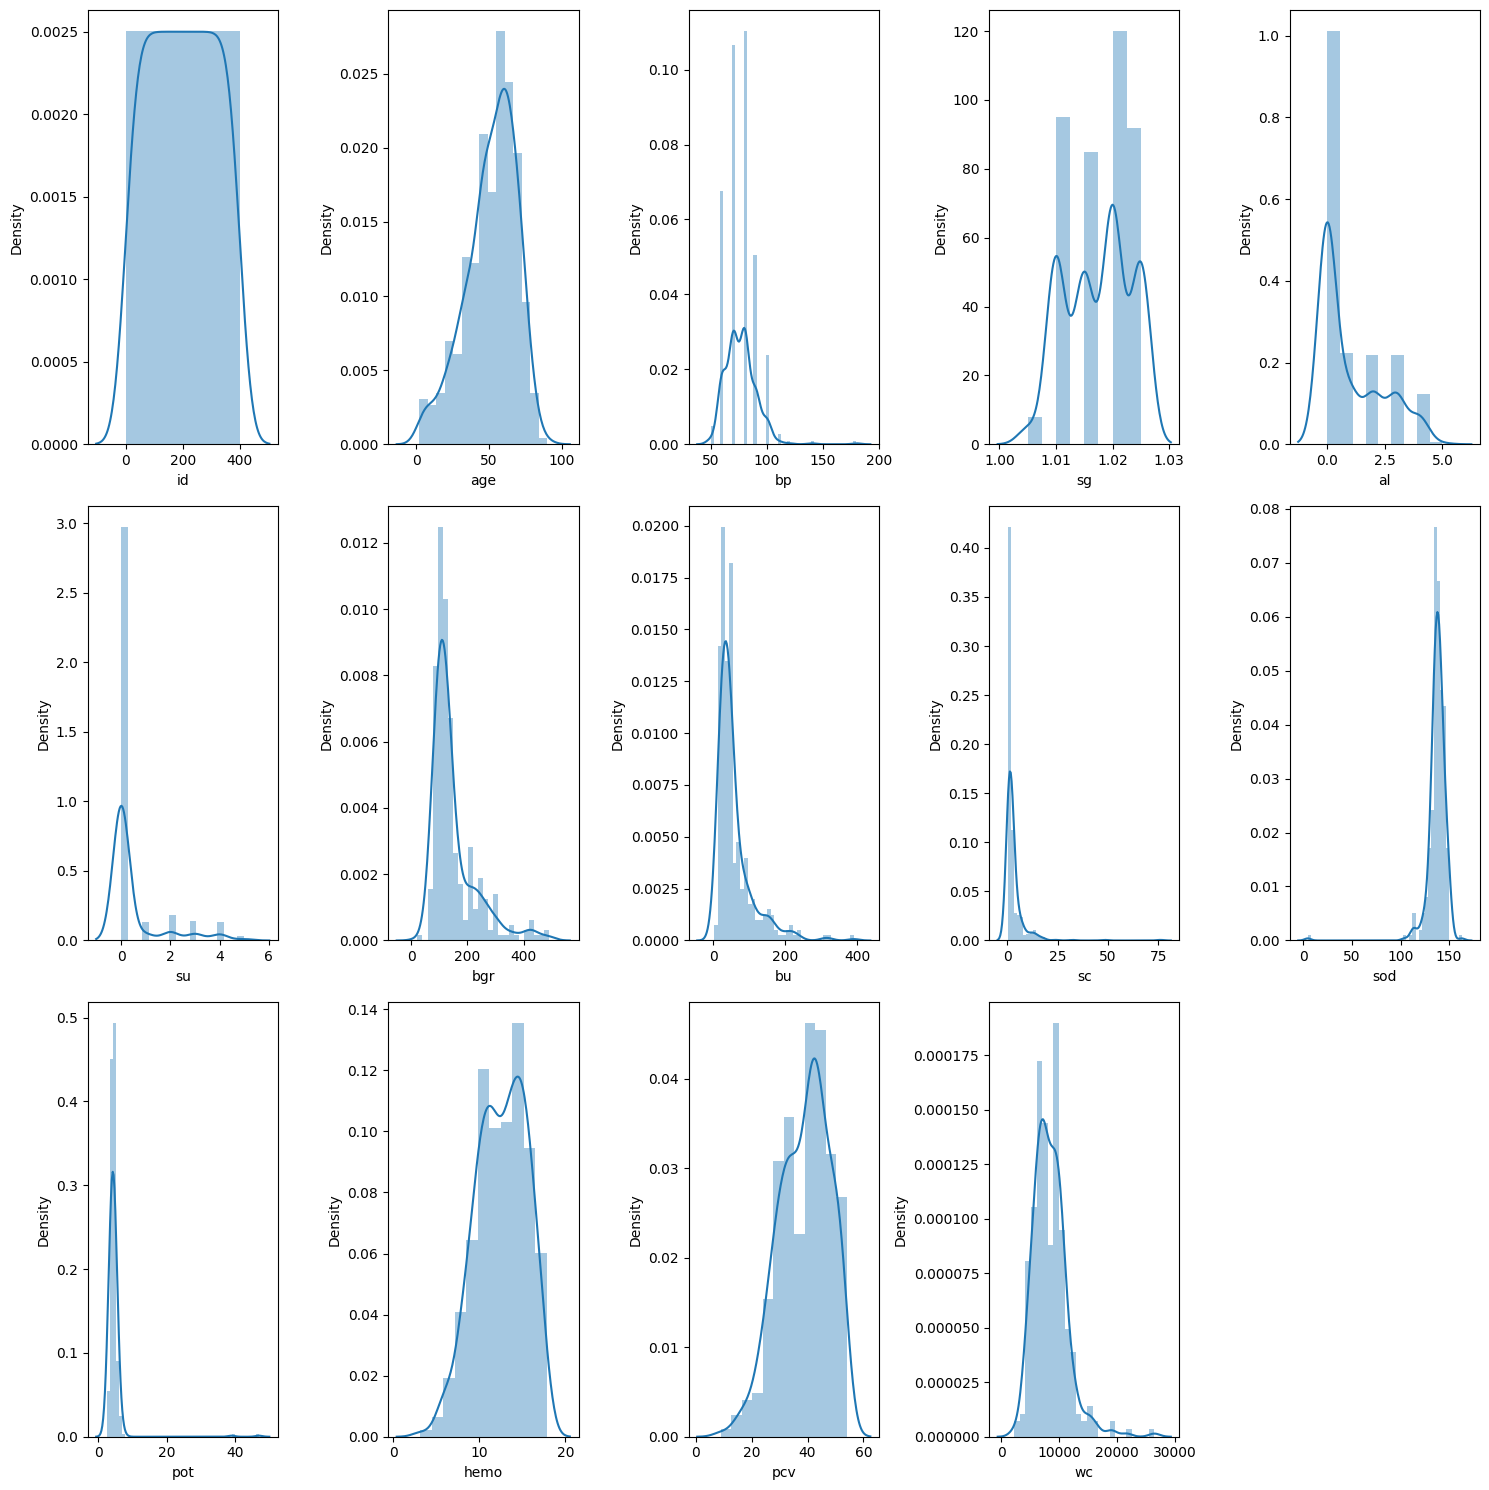

In [8]:
plt.figure(figsize=(15,15))
plotnumber=1

for col in num_cols:
    if plotnumber <=14:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)

    plotnumber +=1

plt.tight_layout()  # 自动调整各个图之间的距离、防止重叠
plt.show()

**用随机抽样填充法，填充数值类型的缺失值**

In [9]:
def solve_mv_random_value(feature):
    random_sample=df[feature].dropna().sample(df[feature].isna().sum(),random_state=42)  # 从该特征的所有非缺失值中随机抽取与缺失值数量相同的样本。
    random_sample.index=df[df[feature].isnull()].index     # 将抽取出的样本的索引设置为原始DataFrame中对应特征缺失值的索引。

    df.loc[df[feature].isnull(),feature]=random_sample

for col in num_cols:
    solve_mv_random_value(col)

# df[num_cols].isnull().sum()
df.isnull().sum()


,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,152
pc,65
pcc,4
ba,4


**打印随机抽样填充后的数值类型的分布图表**

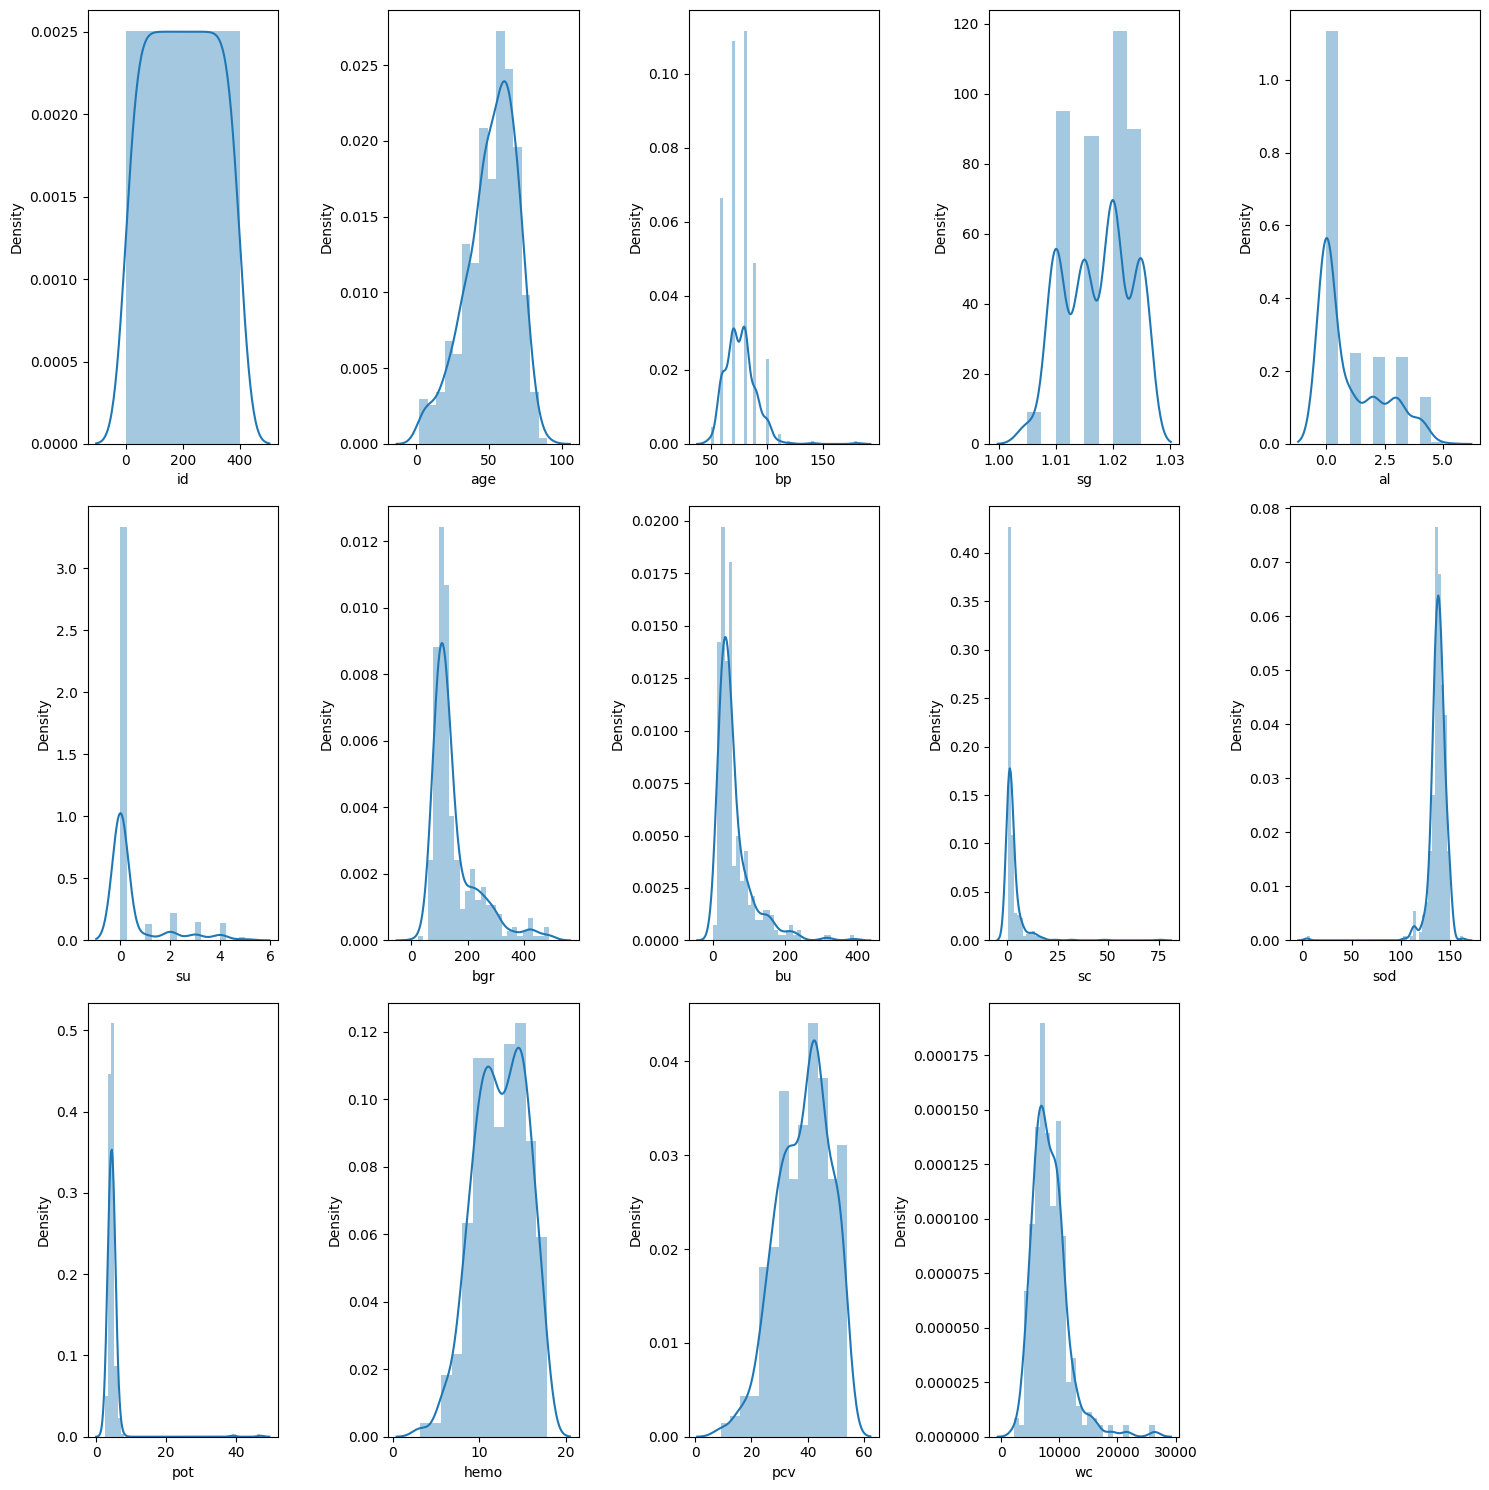

In [10]:
plt.figure(figsize=(15,15))
plotnumber=1

for col in num_cols:
    if plotnumber <=14:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)

    plotnumber +=1

plt.tight_layout()  # 自动调整各个图之间的距离、防止重叠
plt.show()

In [11]:
df = df.dropna()
df.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


**将所有非数值列映射为离散的数值**

In [12]:
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].map({'notpresent': 0, 'present': 1})
df['ba'] = df['ba'].map({'notpresent': 0, 'present': 1})

binary_map = {'yes': 1, 'no': 0}
df['htn'] = df['htn'].map(binary_map)
df['dm'] = df['dm'].map(binary_map)
df['cad'] = df['cad'].map(binary_map)
df['pe'] = df['pe'].map(binary_map)
df['ane'] = df['ane'].map(binary_map)

df['appet'] = df['appet'].map({'good': 1, 'poor': 0})

**特征划分、数据分割、数据表征化**

In [13]:
# 特征和标签
X = df.drop(columns=['classification', 'id'])
y = df['classification']

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  ## 这一步会将df类型的数据转化为np
X_test = scaler.transform(X_test)

**构建DNN模型和训练**

In [16]:
# 构建DNN
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 模型编译
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 模型训练
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6168 - loss: 1.2121 - val_accuracy: 0.8085 - val_loss: 1.2309
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7082 - loss: 1.0874 - val_accuracy: 0.8298 - val_loss: 1.0576
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7837 - loss: 0.8580 - val_accuracy: 0.9362 - val_loss: 0.9204
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8066 - loss: 0.8006 - val_accuracy: 0.9362 - val_loss: 0.8030
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8775 - loss: 0.6863 - val_accuracy: 0.9574 - val_loss: 0.7031
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8142 - loss: 0.7126 - val_accuracy: 0.9574 - val_loss: 0.6235
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8857 - loss: 0.6275 - val_accuracy: 0.9574 - val_loss: 0.5555
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9009 - loss: 0.5982 - val_accuracy: 0.9574 - val_loss: 0.5086


**评估模型**

In [21]:
# 评估模型
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# 混淆矩阵计算
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

# 分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not CKD', 'CKD']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9754 - loss: 0.4563 
Test Loss: 0.4496815502643585
Test Accuracy: 0.978723406791687
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Classification Report:
              precision    recall  f1-score   support

     Not CKD       1.00      0.94      0.97        17
         CKD       0.97      1.00      0.98        30

    accuracy                           0.98        47
   macro avg       0.98      0.97      0.98        47
weighted avg       0.98      0.98      0.98        47



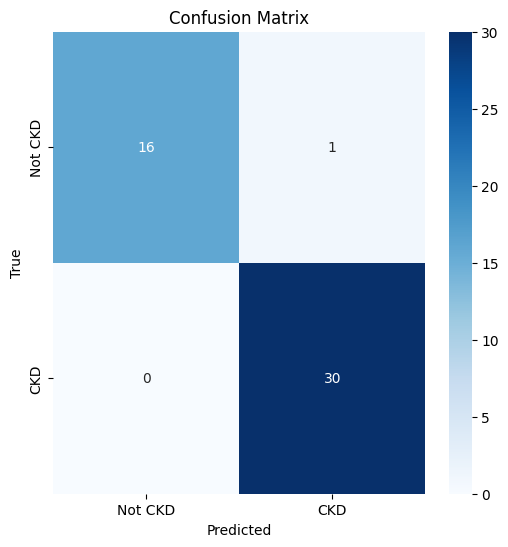

In [22]:
# 绘制混淆矩阵
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

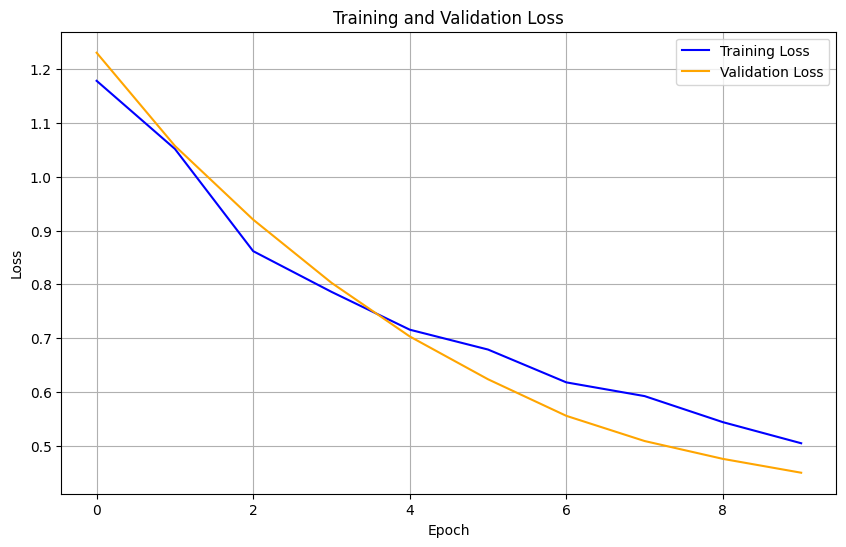

In [23]:
# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training Loss', color='blue')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

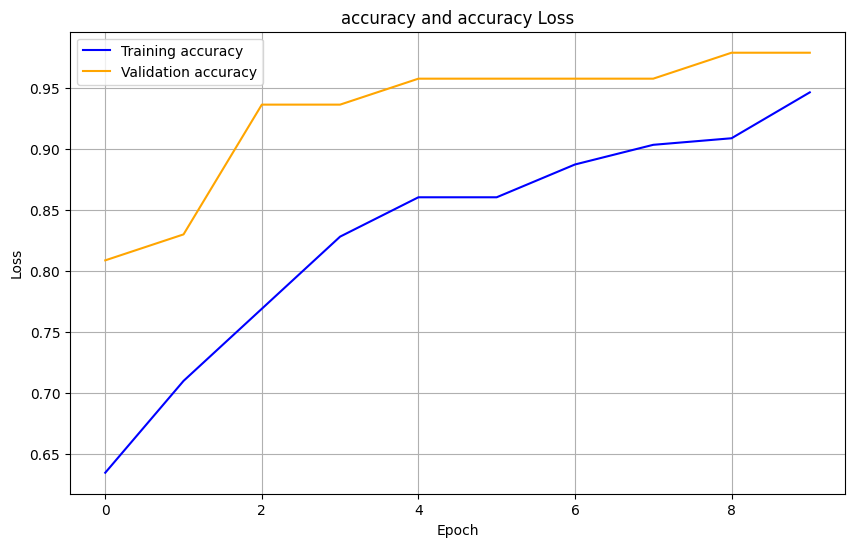

In [24]:
# 绘制ACC曲线
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Training accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy', color='orange')
plt.title('accuracy and accuracy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**用决策树进行预测**

In [25]:
# 特征和标签
X = df.drop(columns=['classification', 'id'])
y = df['classification']

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc=DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dtc.fit(X_train,y_train)

y_pred= dtc.predict(X_test)

dtc_acc=accuracy_score(y_test,y_pred)
dtc_acc

0.9714285714285714

In [27]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

print("Confusion matrix: \n", cm)
print("classification_report: \n",cr)

Confusion matrix: 
 [[24  1]
 [ 1 44]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.98      0.98      0.98        45

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



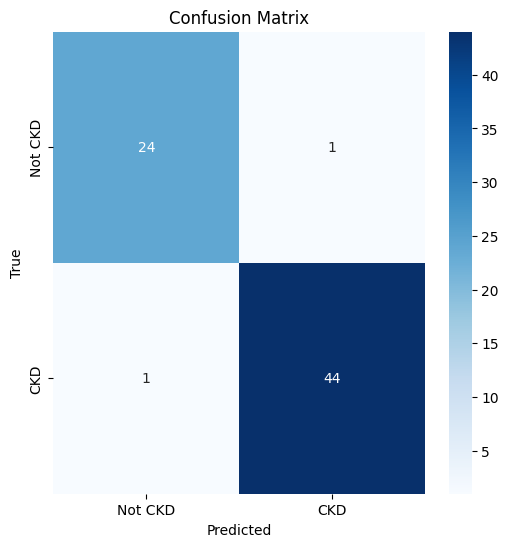

In [29]:
# 绘制混淆矩阵
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

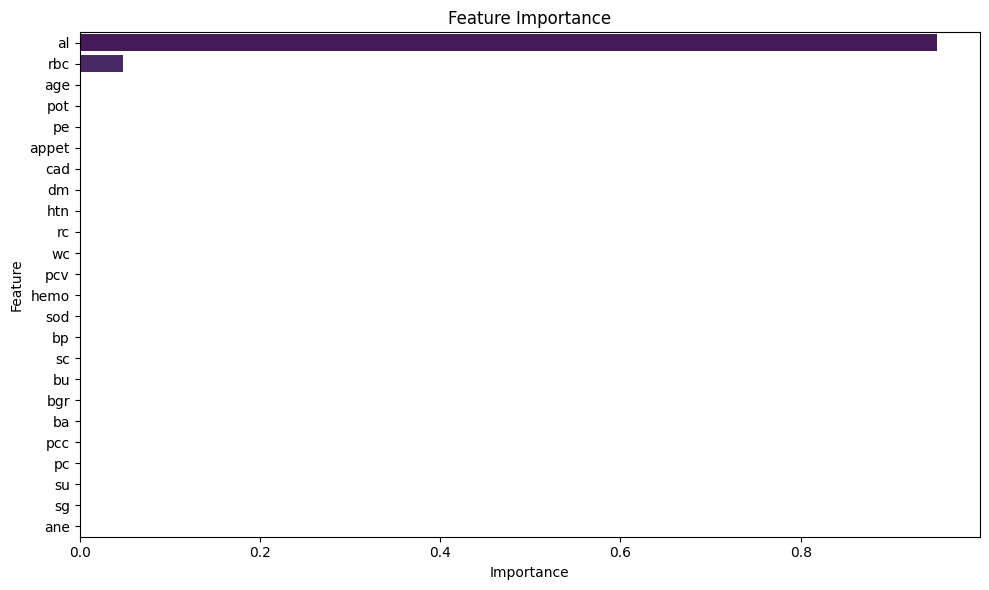

In [30]:
# 获取特征的重要性
feature_importances = dtc.feature_importances_

# 将特征的重要性与特征名称组合在一起
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 按重要性降序排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # 打印特征的重要性
# print(importance_df)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# 显示图形
plt.show()

**用SVM进行预测**

In [32]:
from sklearn.svm import SVC  # 导入SVM模型
from sklearn.pipeline import make_pipeline  # 使用pipeline


# 使用SVM模型（使用pipeline将SVM与标准化结合）
model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# 模型训练
model.fit(X_train, y_train)

# 评估模型
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9714285714285714


In [33]:
# 预测结果
y_pred = model.predict(X_test)

# 混淆矩阵计算
cm = confusion_matrix(y_test, y_pred)

# 分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not CKD', 'CKD']))


Classification Report:
              precision    recall  f1-score   support

     Not CKD       1.00      0.92      0.96        25
         CKD       0.96      1.00      0.98        45

    accuracy                           0.97        70
   macro avg       0.98      0.96      0.97        70
weighted avg       0.97      0.97      0.97        70



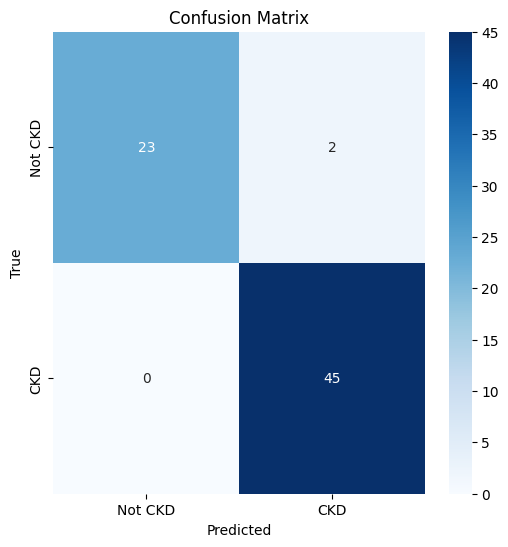

In [34]:
# 绘制混淆矩阵
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**用随机森林进行预测**

In [36]:
from sklearn.ensemble import RandomForestClassifier

# 模型构建：使用随机森林
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 模型训练
model.fit(X_train, y_train)

# 评估模型
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9857142857142858


In [37]:
# 混淆矩阵计算
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not CKD', 'CKD']))


Classification Report:
              precision    recall  f1-score   support

     Not CKD       0.96      1.00      0.98        25
         CKD       1.00      0.98      0.99        45

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.98        70
weighted avg       0.99      0.99      0.99        70



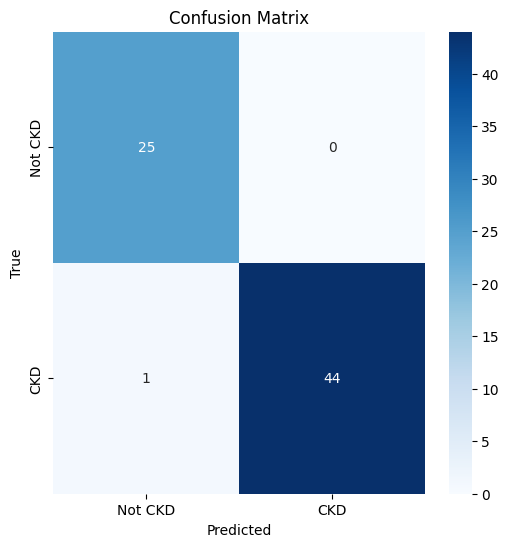

In [38]:
# 绘制混淆矩阵
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()